<a href="https://colab.research.google.com/github/pccalegari/ajuste/blob/master/curva_polarWen09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curva de polarização



1. Aproximação dos parâmetros da curva de polarização   

    Para ajustar os dados experimentais a uma função linear, precisamos obter os parâmetros $a_0$ e $a_1$ de  $$f(x,{\bf a}) = a_0 - a_1x.$$ 
    
    Para o ajuste da curva de polarização por meio da função não linear é necessário obter os parâmetros ${\bf a}$ da função,
$$ V = 0.578 - (a_A + b_A\ln(i)) - (a_C + b_C\ln(i)) - (0.0036\cdot R\cdot i) - c\ln\left(\dfrac{j_L}{j_L-i}\right).$$

Nos dois casos, os parâmetros são obtidos por meio do método dos mínimos quadrados, no qual temos como objetivo minimizar a função resíduo.




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import interpolate


A seguir definimos as funções $f(x,{\bf a})$ (linear e não linear) e a função resíduo $r({\bf a})$.

In [ ]:
def fnlinear(i, aa, ba, ac, bc, r, c, jl, noise=0, n_outliers=0, random_state=0):
    y = 0.578 - (aa + ba*np.log(i)) - (ac + bc*np.log(i)) - (0.0036*r*i) - c*np.log(jl/(jl-i))
    return y

def flinear(x, a, b):
    y = a - b*x 
    return y

def rnlinear(a, x, y):
    return 0.578 - (a[0] + a[1]*np.log(i)) - (a[2] + a[3]*np.log(i)) - (0.0036*a[4]*i) - a[5]*np.log(a[6]/(a[6]-i)) - y

def rlinear(a, x, y):
    return a[0] - a[1]*x - y


Insira os dados para o ajuste da curva de polarização.

> Por exemplo: i = np.array([x_0, x_1, ... , x_n-1])



In [ ]:
i=np.array([0.0001, 0.019, 0.0328, 0.0656, 0.0852, 0.118, 0.2295,0.3475, 0.4787,0.7607, 0.8852, 1.0033, 1.1082, 1.1803, 1.2852, 1.5672, 1.7115, 1.7639, 1.7967])
n = len(i)

Agora insira v = [y_0, y_1, ..., y_n-1]

In [ ]:
v=np.array([0.5777, 0.543, 0.5231, 0.486, 0.4711, 0.4488, 0.424, 0.3942, 0.362, 0.3, 0.2826, 0.2802, 0.2678, 0.243, 0.2182, 0.1512, 0.1041, 0.0893, 0.0719])

Vamos iniciar com o ajuste linear:

In [ ]:
i_min = i[0]
i_max = i[n-1]

x0 = np.array([0.1, 0.1])

res_lin = optimize.least_squares(rlinear, x0, args=(i, v))
    
print("Parâmetros do ajuste Linear")
#print(res_lin)
print("a = ", *res_lin.x)
    

Parâmetros do ajuste Linear
a =  0.5085149513186064 0.23711329874120418


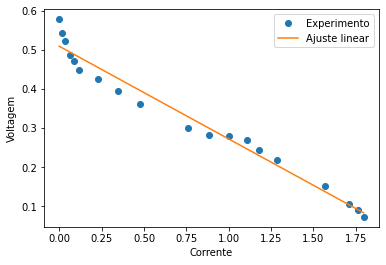

In [ ]:
i_test = np.linspace(i_min, i_max, 100)
 
y_lin = flinear(i_test, *res_lin.x)
  
plt.figure(1)
plt.plot(i, v, 'o', label='Experimento')
plt.plot(i_test, y_lin, label='Ajuste linear')
plt.xlabel("Corrente")
plt.ylabel("Voltagem")
plt.legend()
plt.show()

Agora o ajuste não linear: (É necessário um bom chute inicial, ou seja uma boa escolha para x0)

In [ ]:
i_min = i[0]
i_max = i[n-1]
    
x0 = np.array([0, 0, 0, 0.0, 1.0, 0., 2.0])

res_lsq = optimize.least_squares(rnlinear, x0, args=(i, v))

print("Parâmetros do ajuste Não linear")
print(res_lsq)
print("a = ", *res_lsq.x)



Parâmetros do ajuste Não linear
 active_mask: array([0., 0., 0., 0., 0., 0., 0.])
        cost: 0.0019243125851853458
         fun: array([ 0.01609636, -0.03400423, -0.02500707, -0.00443664,  0.00295558,
        0.01442293,  0.00921276,  0.01165261,  0.01549275,  0.01943893,
        0.01168023, -0.00977372, -0.01867246, -0.00863559, -0.00561094,
       -0.00115697,  0.0064623 ,  0.00119035, -0.00130718])
        grad: array([ 1.08211583e-09,  7.08565741e-09,  1.08211583e-09,  4.07511763e-09,
       -2.12250238e-11,  2.29503540e-08, -9.18443961e-07])
         jac: array([[-1.00000000e+00,  9.21034040e+00, -1.00000000e+00,
         9.21034034e+00, -3.59912877e-07, -5.48958778e-05,
         5.07165243e-07],
       [-1.00000000e+00,  3.96331627e+00, -1.00000000e+00,
         3.96331629e+00, -6.84000629e-05, -1.04849413e-02,
         9.75802287e-05],
       [-1.00000000e+00,  3.41732674e+00, -1.00000000e+00,
         3.41732678e+00, -1.18079978e-04, -1.81698389e-02,
         1.69755160e-04]

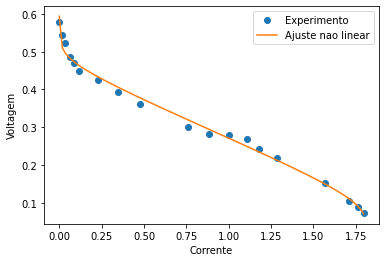

In [ ]:
 i_test = np.linspace(i_min, i_max, 100)
 
 y_lsq = fnlinear(i_test, *res_lsq.x)
  
 plt.figure(2)
 plt.plot(i, v, 'o', label='Experimento')
 plt.plot(i_test, y_lsq, label='Ajuste nao linear')
 plt.xlabel("Corrente")
 plt.ylabel("Voltagem")
 plt.legend()
 plt.show()